In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Optical calculation
I often like to drive my systems at / near the plasmon resonance. To find it, we can run a spectrum using `g-dda.`

In [3]:
%%bash 
cd optical_calculation
python make_sphere.py -w -l 1 -r 5
wait
python make_dirs.py

x_min -11.0
x_max -1.0
y_min -5.0
y_min 5.0
z_min -5.0
z_min 5.0


In [4]:
%%bash
cd optical_calculation
for i in *eV ; do
    cd $i
    ../../../../../g-dda/source_code/ddscat &> output.txt
    cd ../
done

In [7]:
%%bash
for i in optical_calculation/*eV ;do
    cd $i
    cp qtable temp
    sed -i -e "1,14d" temp
    cat temp >>../Spectrum
    rm temp
    cd ../../
done


2.408
optical_calculation/2.408_eV


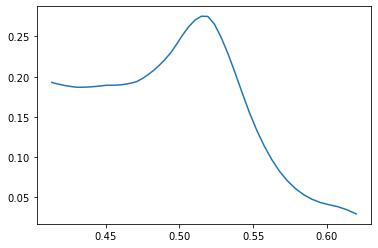

In [5]:
spectrum = np.loadtxt('optical_calculation/Spectrum')
plt.plot(spectrum[:,1], spectrum[:,3])
idx = np.where(spectrum[:,3] == max(spectrum[:,3]))

max_wave = np.round(1.240/spectrum[idx,1][0][0],3)
print(max_wave)
path = str('optical_calculation/')+str(max_wave)+str('_eV')
print(path)

## Thermal calculation


In [17]:
%%bash 

cp optical_calculation/2.408_eV/qtable thermal_calc/qtable
cd thermal_calc
python sphere_qabs.py

In [18]:
%%bash 
cd thermal_calc
../../../source_code/Lattice_Diffusion myGreen.num_300 var.par tdda_input temp.out


512


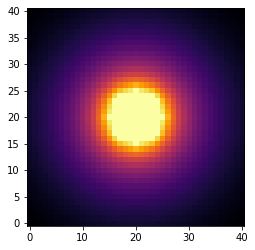

In [19]:
temp_data = np.loadtxt('thermal_calc/temp.out')
idx = np.where(temp_data[:,0] == -6)
DS = 1
y = temp_data[idx,1][0]*DS
z = temp_data[idx,2][0]*DS
T = temp_data[idx,3][0]

idx_sort = np.lexsort((y, z))
new_y = y[idx_sort]
new_z = z[idx_sort]
new_temps = T[idx_sort]
y_wind = int(max(y/DS) - min(y/DS) + 1); z_wind = int(max(z/DS) - min(z/DS) + 1)
temp_grid = new_temps.reshape(y_wind, z_wind, order='f')



plt.imshow(temp_grid,origin='lower',cmap='inferno')



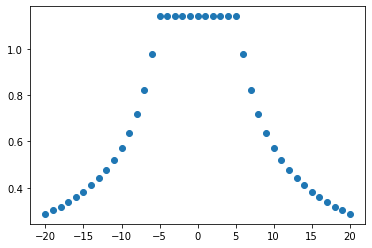

In [20]:
temp_data = np.loadtxt('thermal_calc/temp.out')
idx = np.where((temp_data[:,0] == -6) & (temp_data[:,1] == 0 ))
DS = 1
y = temp_data[idx,1][0]*DS
z = temp_data[idx,2][0]*DS
T = temp_data[idx,3][0]

plt.scatter(z, T)



1.121516
1.1403


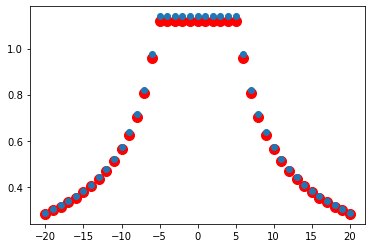

In [33]:
withfields = np.loadtxt('../input_fields_and_pols/thermal_calc/temp.out')
idx = np.where((withfields[:,0] == -6) & (withfields[:,1] == 0 ))
DS = 1
y = withfields[idx,1][0]*DS
z = withfields[idx,2][0]*DS
T = withfields[idx,3][0]

plt.scatter(z, T,s=100, color='red')

print(max(T))

temp_data = np.loadtxt('thermal_calc/temp.out')
idx = np.where((temp_data[:,0] == -6) & (temp_data[:,1] == 0 ))
DS = 1
y = temp_data[idx,1][0]*DS
z = temp_data[idx,2][0]*DS
T = temp_data[idx,3][0]

plt.scatter(z, T)



print(max(T))

In [42]:

kap_out = 0.3 # thermal cond. of background [W/(m*K)]
kap_in = 314 # thermal cond. of metal [W/(m*K)]
I0 = 1E9 # incident intensity [W/m^2]
r = 0 # evaluate T at center of sphere
Q = (2.161258666037098e-05)*(10**-6)**2*I0 # [W]
radius_m = 5.E-9 # [m]
T = Q/(4*np.pi*kap_out*radius_m) + Q/(8*np.pi*kap_in*radius_m**3)*(radius_m**2-r**2)


In [43]:
np.max(T)

1.1471310642250527